In [ ]:
# %%

import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset with Dask
file_path = "dreamt-dataset-for-real-time-sleep-stage-estimation-using-multisensor-wearable-technology-1.0.1/combined_data_with_sids.csv"
combined_data = dd.read_csv(file_path)

In [ ]:
# %%

print("\nDataset Overview:")
print(combined_data.dtypes)


Dataset Overview:
TIMESTAMP            float64
BVP                  float64
ACC_X                float64
ACC_Y                float64
ACC_Z                float64
TEMP                 float64
EDA                  float64
HR                   float64
IBI                  float64
Sleep_Stage           object
Obstructive_Apnea    float64
Central_Apnea        float64
Hypopnea             float64
Multiple_Events      float64
SID                   object
dtype: object


In [ ]:
#%%

# Compute the number of rows and columns
num_rows = combined_data.shape[0].compute()  # Compute the delayed row count
num_columns = combined_data.shape[1]  
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 203531428
Number of Columns: 15


In [ ]:
#%%

print("\nFirst Few Rows:")
print(combined_data.head())


First Few Rows:
   TIMESTAMP    BVP  ACC_X  ACC_Y  ACC_Z   TEMP       EDA    HR  IBI  \
0   0.000000   4.64  -69.0   10.0    4.0  32.77  0.101213  60.0  NaN   
1   0.015625   6.29  -69.0   10.0    4.0  32.77  0.101213  60.0  NaN   
2   0.031250   7.86  -68.0   11.0    2.0  32.77  0.101213  60.0  NaN   
3   0.046875   9.19  -68.0   11.0    2.0  32.77  0.101213  60.0  NaN   
4   0.062500  10.13  -64.0   10.0    1.0  32.77  0.101213  60.0  NaN   

  Sleep_Stage  Obstructive_Apnea  Central_Apnea  Hypopnea  Multiple_Events  \
0           P                NaN            NaN       NaN              NaN   
1           P                NaN            NaN       NaN              NaN   
2           P                NaN            NaN       NaN              NaN   
3           P                NaN            NaN       NaN              NaN   
4           P                NaN            NaN       NaN              NaN   

    SID  
0  S083  
1  S083  
2  S083  
3  S083  
4  S083  


In [ ]:
# %%

# Filter the Dask DataFrame for rows with SID == "S103"
filtered_data = combined_data[combined_data["SID"] == "S103"]

# Check if the filtered_data is empty
if filtered_data.shape[0].compute() == 0:
    print("No data found for SID S103.")
else:
    # Compute and convert the filtered data to pandas for inspection
    filtered_data_pd = filtered_data.compute()
    print("Filtered Data for SID S103:")
    print(filtered_data_pd)

Filtered Data for SID S103:
           TIMESTAMP    BVP  ACC_X  ACC_Y  ACC_Z   TEMP       EDA     HR  \
127141      0.000000   6.65   13.0  -25.0   56.0  29.35  0.028186  59.00   
127142      0.015625   0.54   13.0  -25.0   56.0  29.35  0.028186  59.00   
127143      0.031250  -2.65   14.0  -25.0   57.0  29.35  0.028186  59.00   
127144      0.046875  -1.64   14.0  -25.0   57.0  29.35  0.028186  59.00   
127145      0.062500   3.38   14.0  -25.0   58.0  29.35  0.028186  59.00   
...              ...    ...    ...    ...    ...    ...       ...    ...   
371396  30476.937500  23.98  -36.0  -33.0   44.0  35.41  0.206269  68.28   
371397  30476.953125  23.29  -36.0  -33.0   44.0  35.41  0.206269  68.28   
371398  30476.968750  21.70  -36.0  -33.0   43.0  35.41  0.206269  68.28   
371399  30476.984375  20.43  -36.0  -33.0   43.0  35.41  0.206269  68.28   
371400  30477.000000  19.74  -36.0  -33.0   44.0  35.39  0.204988  68.23   

             IBI Sleep_Stage  Obstructive_Apnea  Central_Ap

In [ ]:
# %%

#Check for missing values
missing_values = combined_data.isnull().sum().compute()
print("\nMissing Values:")
print(missing_values)


Missing Values:
TIMESTAMP                    0
BVP                          0
ACC_X                        0
ACC_Y                        0
ACC_Z                        0
TEMP                         0
EDA                          0
HR                           0
IBI                    1004340
Sleep_Stage                  0
Obstructive_Apnea    201158891
Central_Apnea        202187222
Hypopnea             191715892
Multiple_Events      203160492
SID                          0
dtype: int64


In [ ]:
# %%

filtered_data = combined_data[(combined_data["HR"] == 0) | (combined_data["HR"].isnull())]
filtered_data.head()

/Users/charanreddy/anaconda3/lib/python3.11/site-packages/dask/dataframe/core.py:8093: UserWarning: Insufficient elements for `head`. 5 elements requested, only 0 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(


,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events,SID


In [ ]:
# %%

# Analyze IBI values
# Percentage of missing IBI values
missing_ibi = combined_data["IBI"].isnull().sum().compute()
total_rows = combined_data.shape[0].compute()
missing_percentage = (missing_ibi / total_rows) * 100

print(f"Total Missing IBI Values: {missing_ibi}")
print(f"Percentage of Missing IBI Values: {missing_percentage:.2f}%")

Total Missing IBI Values: 1004340
Percentage of Missing IBI Values: 0.49%


In [ ]:
# %%

# Analyze IBI values
# Count consecutive missing values in IBI
combined_data["IBI_Missing"] = combined_data["IBI"].isnull()

# Group by consecutive missing streaks
streaks = combined_data.groupby(combined_data["IBI_Missing"].cumsum())

# Get streak lengths for missing values
missing_streak_lengths = streaks.size().compute()
longest_missing_streak = missing_streak_lengths.max()

print(f"Total Missing: {len(missing_streak_lengths)}")
print(f"Longest Missing Streak in IBI: {longest_missing_streak} timestamps")

Total Missing: 1004340
Longest Missing Streak in IBI: 2339317 timestamps


In [ ]:
# %%

combined_data.head()

,TIMESTAMP,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage,Obstructive_Apnea,Central_Apnea,Hypopnea,Multiple_Events,SID,IBI_Missing
0,0.000000,4.64,-69.0,10.0,4.0,32.77,0.101213,60.0,NaN,P,NaN,NaN,NaN,NaN,S083,True
1,0.015625,6.29,-69.0,10.0,4.0,32.77,0.101213,60.0,NaN,P,NaN,NaN,NaN,NaN,S083,True
2,0.031250,7.86,-68.0,11.0,2.0,32.77,0.101213,60.0,NaN,P,NaN,NaN,NaN,NaN,S083,True
3,0.046875,9.19,-68.0,11.0,2.0,32.77,0.101213,60.0,NaN,P,NaN,NaN,NaN,NaN,S083,True
4,0.062500,10.13,-64.0,10.0,1.0,32.77,0.101213,60.0,NaN,P,NaN,NaN,NaN,NaN,S083,True


In [ ]:
# %%

# Extract SIDs and Sleep Stages for missing IBI
missing_ibi_data = combined_data[combined_data["IBI"].isnull()]
missing_ibi_details = missing_ibi_data[["SID", "Sleep_Stage"]].compute()

# Analyze missing IBI by SID and Sleep Stage
missing_ibi_grouped = missing_ibi_details.groupby(["SID", "Sleep_Stage"]).size()
print("\nMissing IBI Counts by SID and Sleep Stage:")
print(missing_ibi_grouped)
# Looks like if Stage is "P" then IBI is NaN


Missing IBI Counts by SID and Sleep Stage:
SID   Sleep_Stage
S002  P               1488
S003  P              20411
S004  P               5902
S005  P                148
S006  P               1185
                     ...  
S099  P               3256
S100  P               7212
S101  P               7661
S102  P              56282
S103  P              58166
Length: 100, dtype: int64


In [ ]:
# %%

#Count sleep stage in missing IBI data
sleep_stage_counts = missing_ibi_data.groupby("Sleep_Stage").size().compute()

# Display the counts
print("\nCounts of Sleep Stages in Missing IBI Data:")
print(sleep_stage_counts)


Counts of Sleep Stages in Missing IBI Data:
Sleep_Stage
P    1004340
dtype: int64


In [ ]:
# %%

# Count number of "P" sleep stages in the dataset
# Count occurrences of 'P' in Sleep_Stage
p_count = combined_data[combined_data["Sleep_Stage"] == "P"].shape[0].compute()

print(f"Number of 'P' sleep stages in the combined data: {p_count}")

Number of 'P' sleep stages in the combined data: 49443712


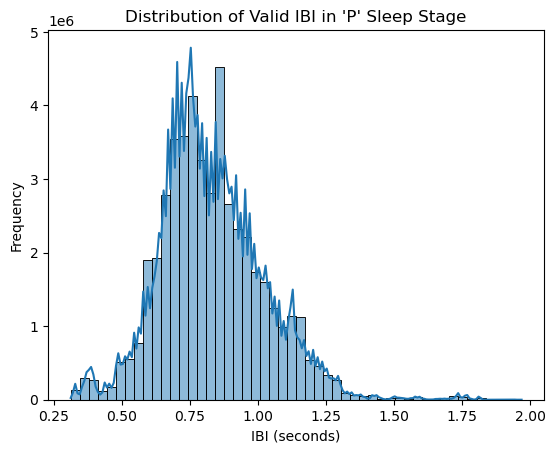

In [ ]:
# %%

import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid IBI rows in the 'P' sleep stage
valid_ibi_p_stage = combined_data[(combined_data["Sleep_Stage"] == "P") & (~combined_data["IBI"].isnull())].compute()

# Plot distribution of valid IBI in the 'P' stage
sns.histplot(valid_ibi_p_stage["IBI"], kde=True, bins=50)
plt.title("Distribution of Valid IBI in 'P' Sleep Stage")
plt.xlabel("IBI (seconds)")
plt.ylabel("Frequency")
plt.show()

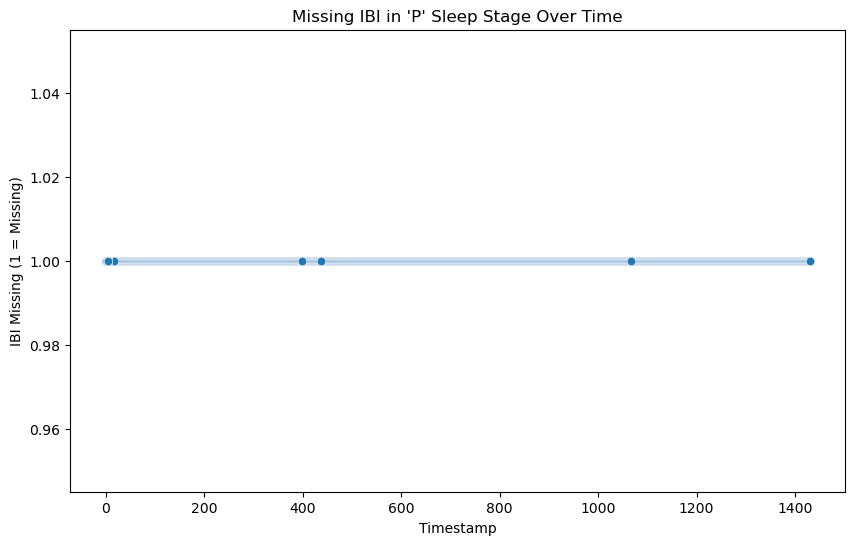

In [ ]:
# %%

# Filter rows where Sleep Stage is 'P' and IBI is missing
missing_ibi_p_stage = combined_data[(combined_data["Sleep_Stage"] == "P") & (combined_data["IBI"].isnull())].compute()

# Plot missing IBI over time (using TIMESTAMP)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=missing_ibi_p_stage["TIMESTAMP"], y=missing_ibi_p_stage["IBI_Missing"], alpha=0.5)
plt.title("Missing IBI in 'P' Sleep Stage Over Time")
plt.xlabel("Timestamp")
plt.ylabel("IBI Missing (1 = Missing)")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


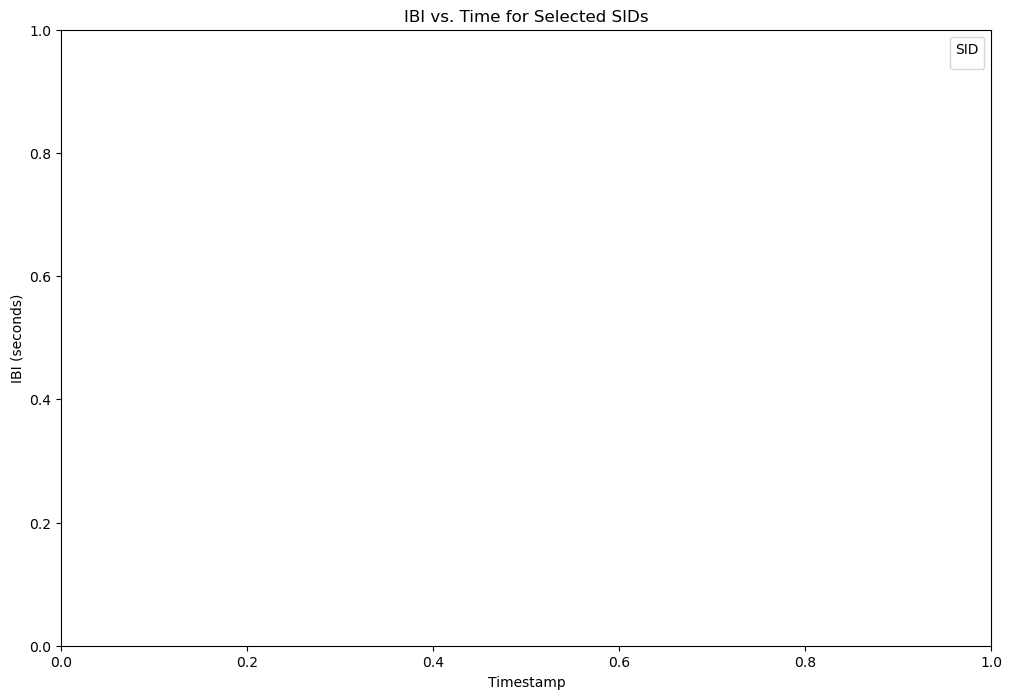

In [ ]:
# %%

# Select 5 specific SIDs (replace these with actual SIDs from your dataset)
SelS001 = combined_data[combined_data["SID"] == "S001"].compute()


# Plot IBI vs. Time for each SID
plt.figure(figsize=(12, 8))
sns.lineplot(data=SelS001, x="TIMESTAMP", y="IBI", hue="SID", marker="o", alpha=0.7)
plt.title("IBI vs. Time for Selected SIDs")
plt.xlabel("Timestamp")
plt.ylabel("IBI (seconds)")
plt.legend(title="SID", loc="best")
plt.show()
# we can 

In [ ]:
# %%

# Analyze NaN patterns for IBI for each SID
sids = combined_data["SID"].unique().compute()

nan_pattern_results = []

for sid in sids:
    # Filter data for the current SID
    sid_data = combined_data[combined_data["SID"] == sid].compute()
    
    # Add a flag for missing IBI
    sid_data["IBI_Missing"] = sid_data["IBI"].isnull()
    
    # Find the first non-missing IBI timestamp
    first_non_missing_row = sid_data[~sid_data["IBI_Missing"]]
    if not first_non_missing_row.empty:
        first_non_missing_time = first_non_missing_row["TIMESTAMP"].iloc[0]
    else:
        first_non_missing_time = None

    # Check if NaNs are only at the start
    if first_non_missing_time is None:
        only_start_missing = True  
    else:
        only_start_missing = (sid_data[sid_data["IBI_Missing"]]["TIMESTAMP"] < first_non_missing_time).all()

    # Calculate the longest NaN streak
    streaks = sid_data["IBI_Missing"].cumsum()
    streak_lengths = sid_data.groupby(streaks)["IBI_Missing"].sum()
    
    nan_pattern_results.append({
        "SID": sid,
        "Total_NaN": sid_data["IBI_Missing"].sum(),
        "Longest_NaN_Streak": streak_lengths.max(),
        "NaNs_Only_At_Start": only_start_missing
    })

# Convert results to a DataFrame
import pandas as pd
nan_pattern_df = pd.DataFrame(nan_pattern_results)

# Display the results
print(nan_pattern_df)

     SID  Total_NaN  Longest_NaN_Streak  NaNs_Only_At_Start
0   S083      37393                   1                True
1   S029       1866                   1                True
2   S084        230                   1                True
3   S091        620                   1                True
4   S096       1293                   1                True
..   ...        ...                 ...                 ...
95  S094      28032                   1                True
96  S093       4085                   1                True
97  S039      25584                   1                True
98  S008       1053                   1                True
99  S048        313                   1                True

[100 rows x 4 columns]


In [ ]:
# %%

print(combined_data[combined_data["Sleep_Stage"] == "P"]["SID"].value_counts().compute())

S035    689344
S088    675328
S071    669440
S028    667584
S046    663872
         ...  
S014    303552
S034    298048
S044    288640
S092    279040
S020    246336
Name: SID, Length: 100, dtype: int64


In [ ]:
#%%

# Check if "Missing" stages align with sensor dropouts
missing_signal = combined_data[combined_data["Sleep_Stage"] == "Missing"]
print(missing_signal[["HR", "BVP", "EDA", "TEMP"]].isnull().mean().compute())

HR      0.0
BVP     0.0
EDA     0.0
TEMP    0.0
dtype: float64


In [ ]:
#%%

# Check if P stage has any  other columns missing
# Filter rows where Sleep_Stage is "P"
p_stage_data = combined_data[combined_data["Sleep_Stage"] == "P"]

# Check if "P" exists
if p_stage_data.shape[0].compute() == 0:
    print("No 'P' stage data found.")
else:
    # Compute missing values for key columns
    missing_values = p_stage_data[["HR", "BVP", "EDA", "TEMP", "IBI", "ACC_X", "ACC_Y", "ACC_Z"]].isnull().sum().compute()
    missing_pct = (missing_values / p_stage_data.shape[0].compute()) * 100

    # Create summary table
    missing_summary = pd.DataFrame({
        "Missing_Count": missing_values,
        "Missing_Percent (%)": missing_pct.round(2)
    })
    print("Missing Values in 'P' Stage:")
    print(missing_summary)

Missing Values in 'P' Stage:
       Missing_Count  Missing_Percent (%)
HR               0.0                 0.00
BVP              0.0                 0.00
EDA              0.0                 0.00
TEMP             0.0                 0.00
IBI        1004340.0                 2.03
ACC_X            0.0                 0.00
ACC_Y            0.0                 0.00
ACC_Z            0.0                 0.00


N2         76978529
P          49443712
W          38678450
N1         16965129
R          16152968
N3          5191680
Missing      120960
Name: Sleep_Stage, dtype: int64


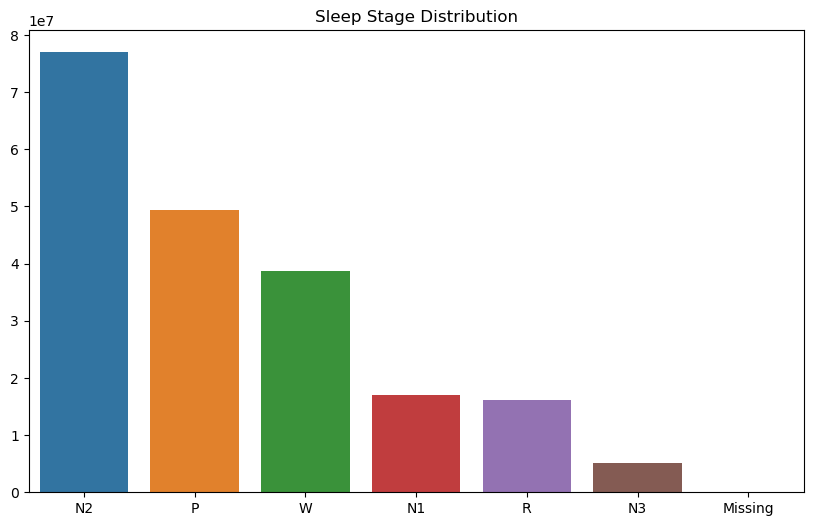

In [ ]:
#%%

sleep_stage_counts = combined_data["Sleep_Stage"].value_counts().compute()
print(sleep_stage_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=sleep_stage_counts.index, y=sleep_stage_counts.values)
plt.title("Sleep Stage Distribution")
plt.show()

# %%[markdown]

 There is 120960 missing stages nad there is significatly large class imablnce in the data

#%%[markdown]

 Based on the EDA of P and infromation from the https://physionet.org/content/dreamt/1.0.1/ we can assume P is purely prepartional stage and we can drop the rows with P stage(can not assume as wake stage)

In [ ]:
#%%

# Drop rows with "P" sleep stage
combined_data = combined_data[combined_data["Sleep_Stage"] != "P"]

In [ ]:
#%%

# Drop unrelavent columns
columns_to_drop = ["Obstructive_Apnea", "Central_Apnea", "Hypopnea", "Multiple_Events"]
combined_data = combined_data.drop(columns=columns_to_drop)
print(filtered_data.columns)

Index(['TIMESTAMP', 'BVP', 'ACC_X', 'ACC_Y', 'ACC_Z', 'TEMP', 'EDA', 'HR',
       'IBI', 'Sleep_Stage', 'Obstructive_Apnea', 'Central_Apnea', 'Hypopnea',
       'Multiple_Events', 'SID'],
      dtype='object')


In [ ]:
#%%

print(combined_data.isnull().sum().compute())

TIMESTAMP      0
BVP            0
ACC_X          0
ACC_Y          0
ACC_Z          0
TEMP           0
EDA            0
HR             0
IBI            0
Sleep_Stage    0
SID            0
IBI_Missing    0
dtype: int64


#%%[markdown]

 There is no missing IBI values after droping P stage

In [ ]:
#%%

combined_data = combined_data[combined_data["Sleep_Stage"] != "Missing"]

N2    76978529
W     38678450
N1    16965129
R     16152968
N3     5191680
Name: Sleep_Stage, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

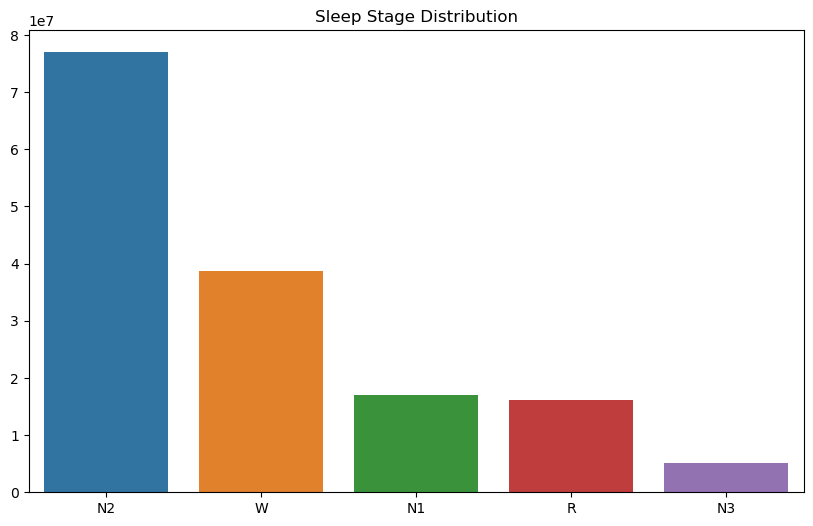

In [ ]:
# %%

sleep_stage_counts = combined_data["Sleep_Stage"].value_counts().compute()
print(sleep_stage_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=sleep_stage_counts.index, y=sleep_stage_counts.values)
plt.title("Sleep Stage Distribution")
plt.show

In [ ]:
# %%

processed_data = combined_data
output_file = ("Processed_Data.csv")
processed_data.to_csv(output_file, single_file=True, index=False)
print(f"Saved")

Saved
